This notebook compares the content of the reads that were used to build the metapangenome graphs. 
The first heatmap shows the compare matrix for the diginorm'd reads, while the second shows the compare matrix for the diginorm'd + hardtrimmed reads. Hardtrimming reduced the overlap between the different genome query neighborhoods. After hardtrimming, the highest similarity was 0.59 for a pair F. prausnitzii genome queries.

These plot show that while there is overlapping content in the genome query neighborhoods, each graph represents some distinct content that is not captured by completely by reads from another query neighborhood.

In [17]:
# adjust plot size rendered inline
options(repr.plot.width = 11, repr.plot.height = 11, repr.plot.res = 300)

In [1]:
setwd("..")

In [4]:
library(dplyr)
library(readr)
library(ggplot2)
library(pheatmap)
library(RColorBrewer)

### read in lineage information

In [6]:
lineages <- read_csv("outputs/genbank/gather_vita_vars_gtdb_shared_assemblies.x.genbank.lineages.csv",
                     col_names = c("accession", "domain", "phyla", "class", "order",
                                   "family", "genus", "species"), show_col_types = F) %>%
  mutate(accession = gsub("_genomic.fna.gz", "", accession))

### plot diginorm reads sourmash compare

In [10]:
comp <- read_csv("sandbox/sgc_genome_queries_diginorm_compare/comp_k31_scaled2000.csv", show_col_types = F)
comp <- comp %>%
  rename_with(stringr::str_replace, 
              pattern = ".diginorm.fa.gz", replacement = "", 
              matches(".diginorm.fa.gz")) %>%
  mutate(accession = colnames(.)) %>%
  left_join(lineages, by = "accession")

In [11]:
# set column and rownames on comparison matrix
colnames(comp) <- comp$species
comp <- comp[ , 1:54]
rownames(comp) <- colnames(comp)

Warning message:
“Setting row names on a tibble is deprecated.”


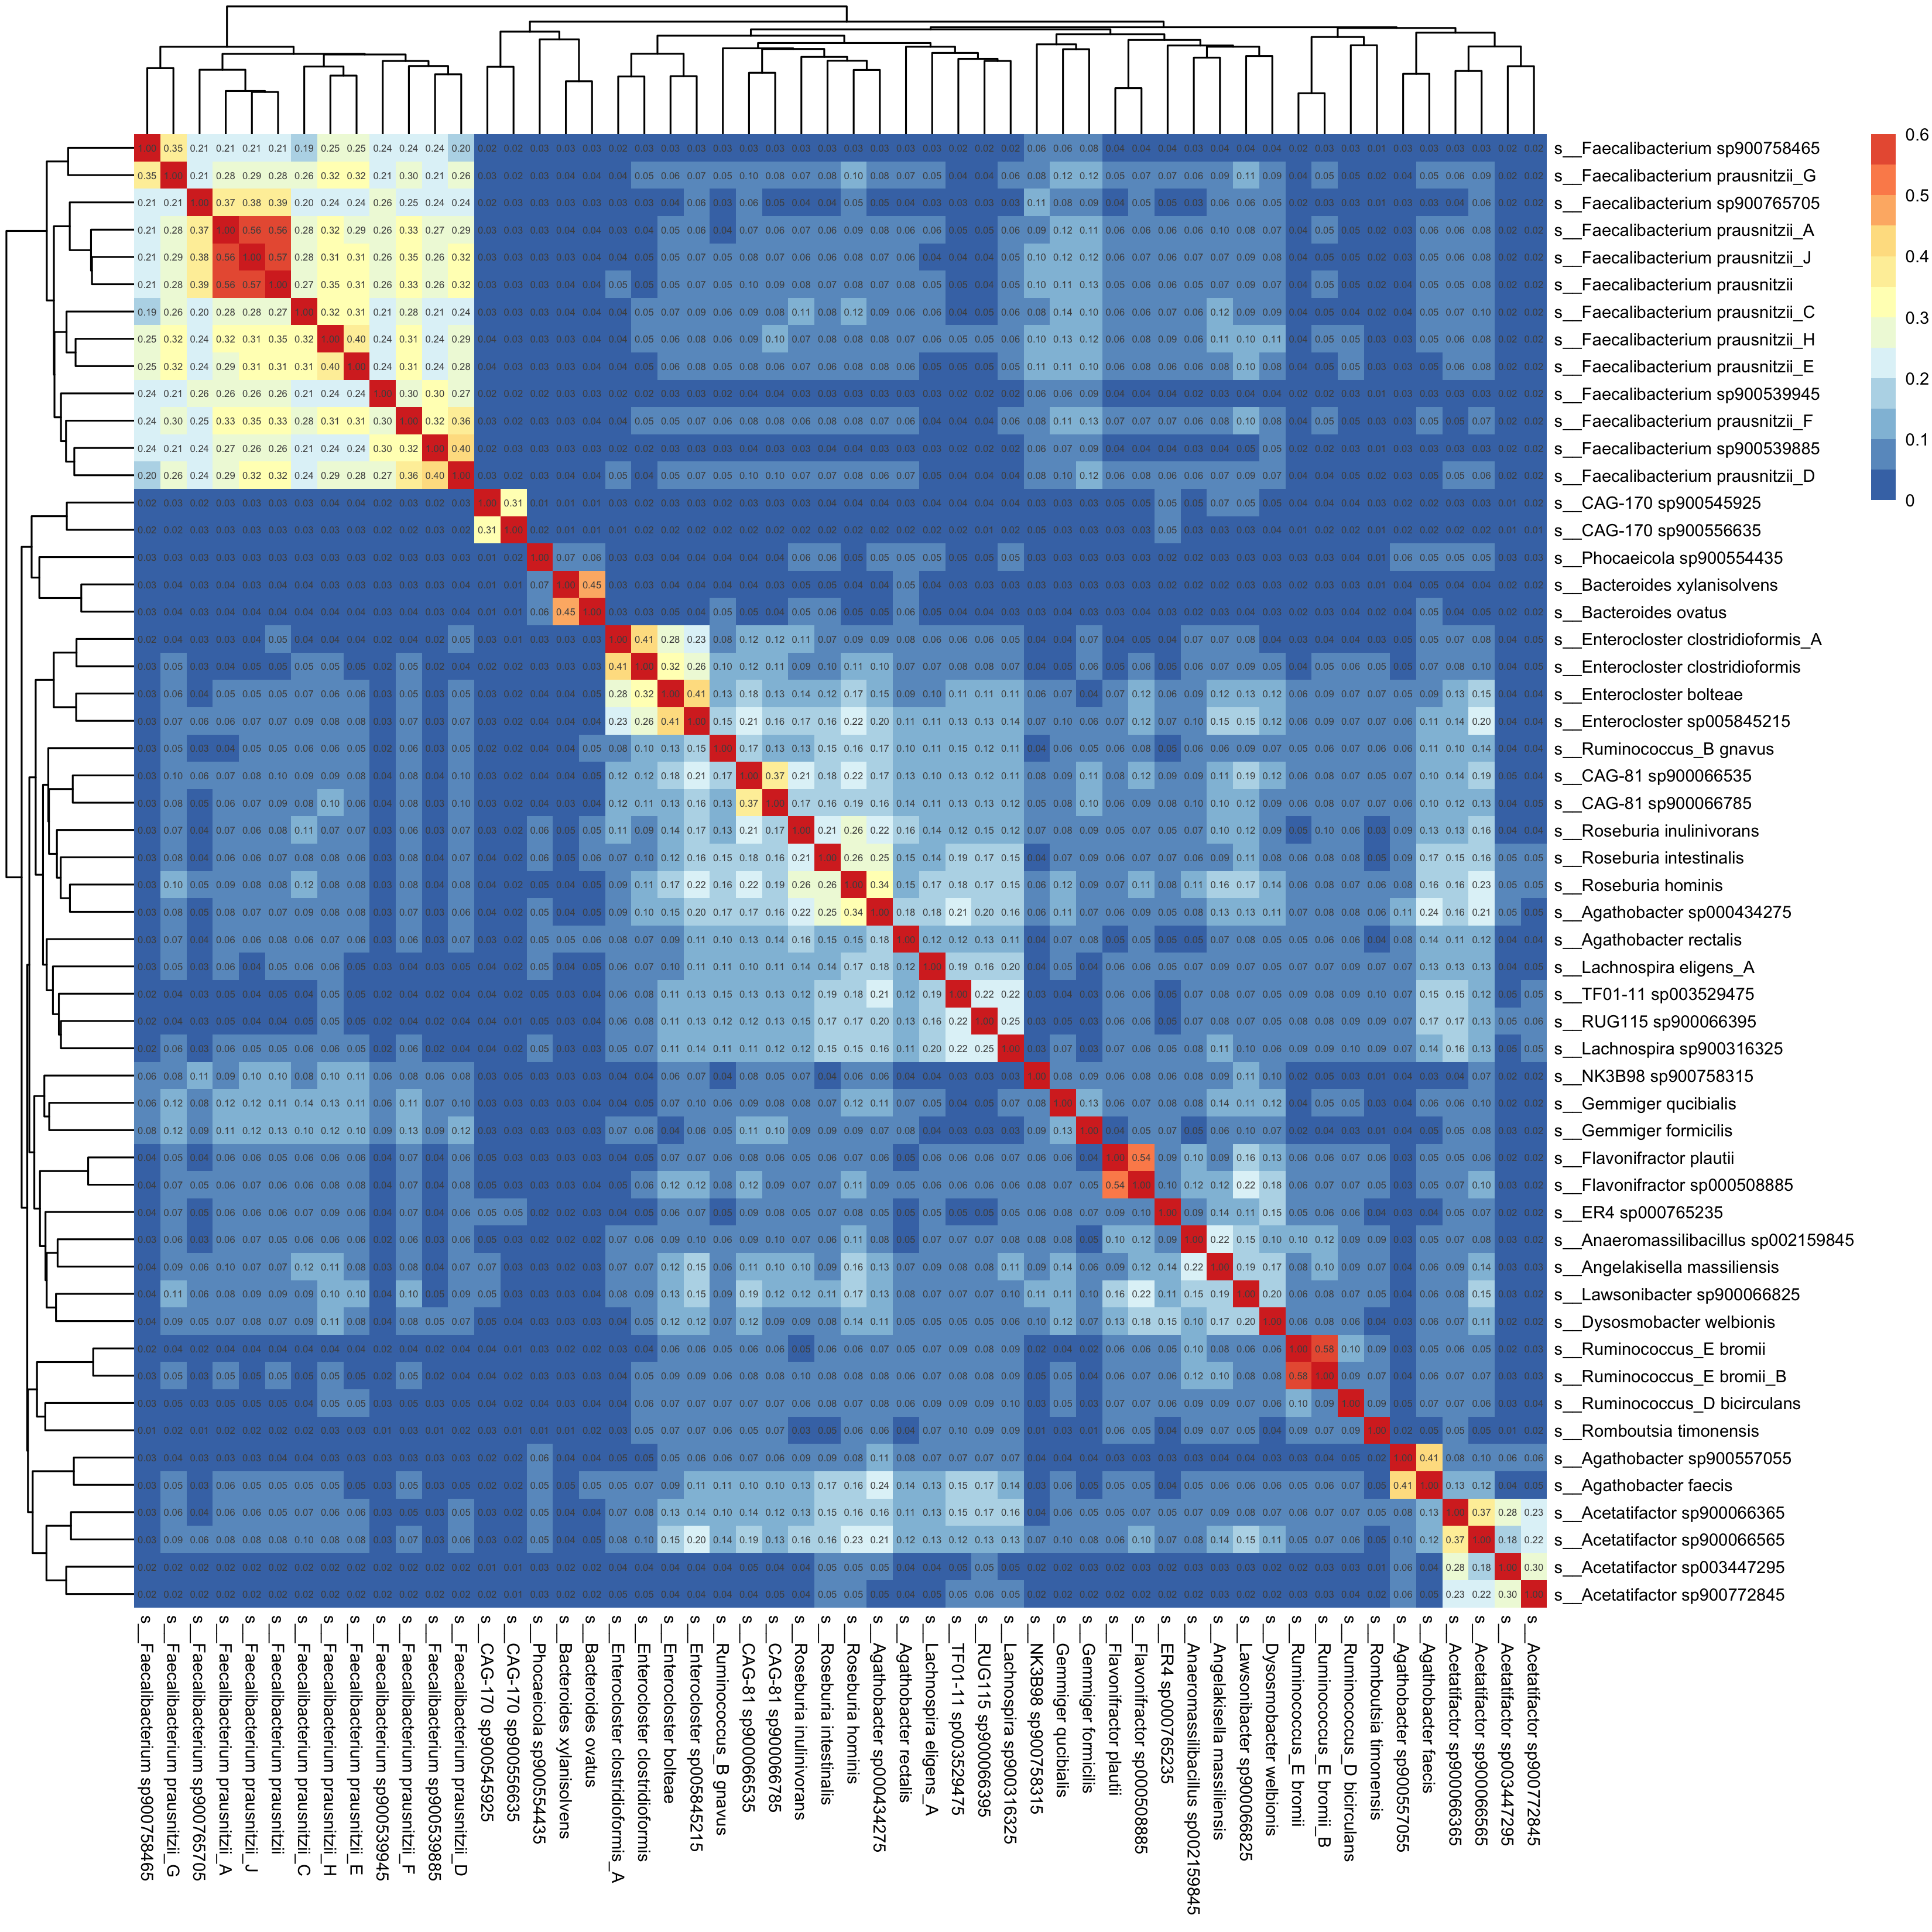

In [18]:
# generate heatmap
breaklist <- seq(0, .6, by = .05)
pheatmap(comp, fontsize = 7, display_numbers = T, fontsize_number = 4,
         border_color = NA, breaks = breaklist,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaklist)))


### compare to hardtrim

In [21]:
comp <- read_csv("sandbox/sgc_genome_queries_hardtrim_compare/comp_k31_scaled2000.csv", show_col_types = F)
comp <- comp %>%
  rename_with(stringr::str_replace, 
              pattern = ".hardtrim.fa.gz", replacement = "", 
              matches(".hardtrim.fa.gz")) %>%
  mutate(accession = colnames(.)) %>%
  left_join(lineages, by = "accession")

In [22]:
colnames(comp) <- comp$species
comp <- comp[ , 1:54]
rownames(comp) <- colnames(comp)

Warning message:
“Setting row names on a tibble is deprecated.”


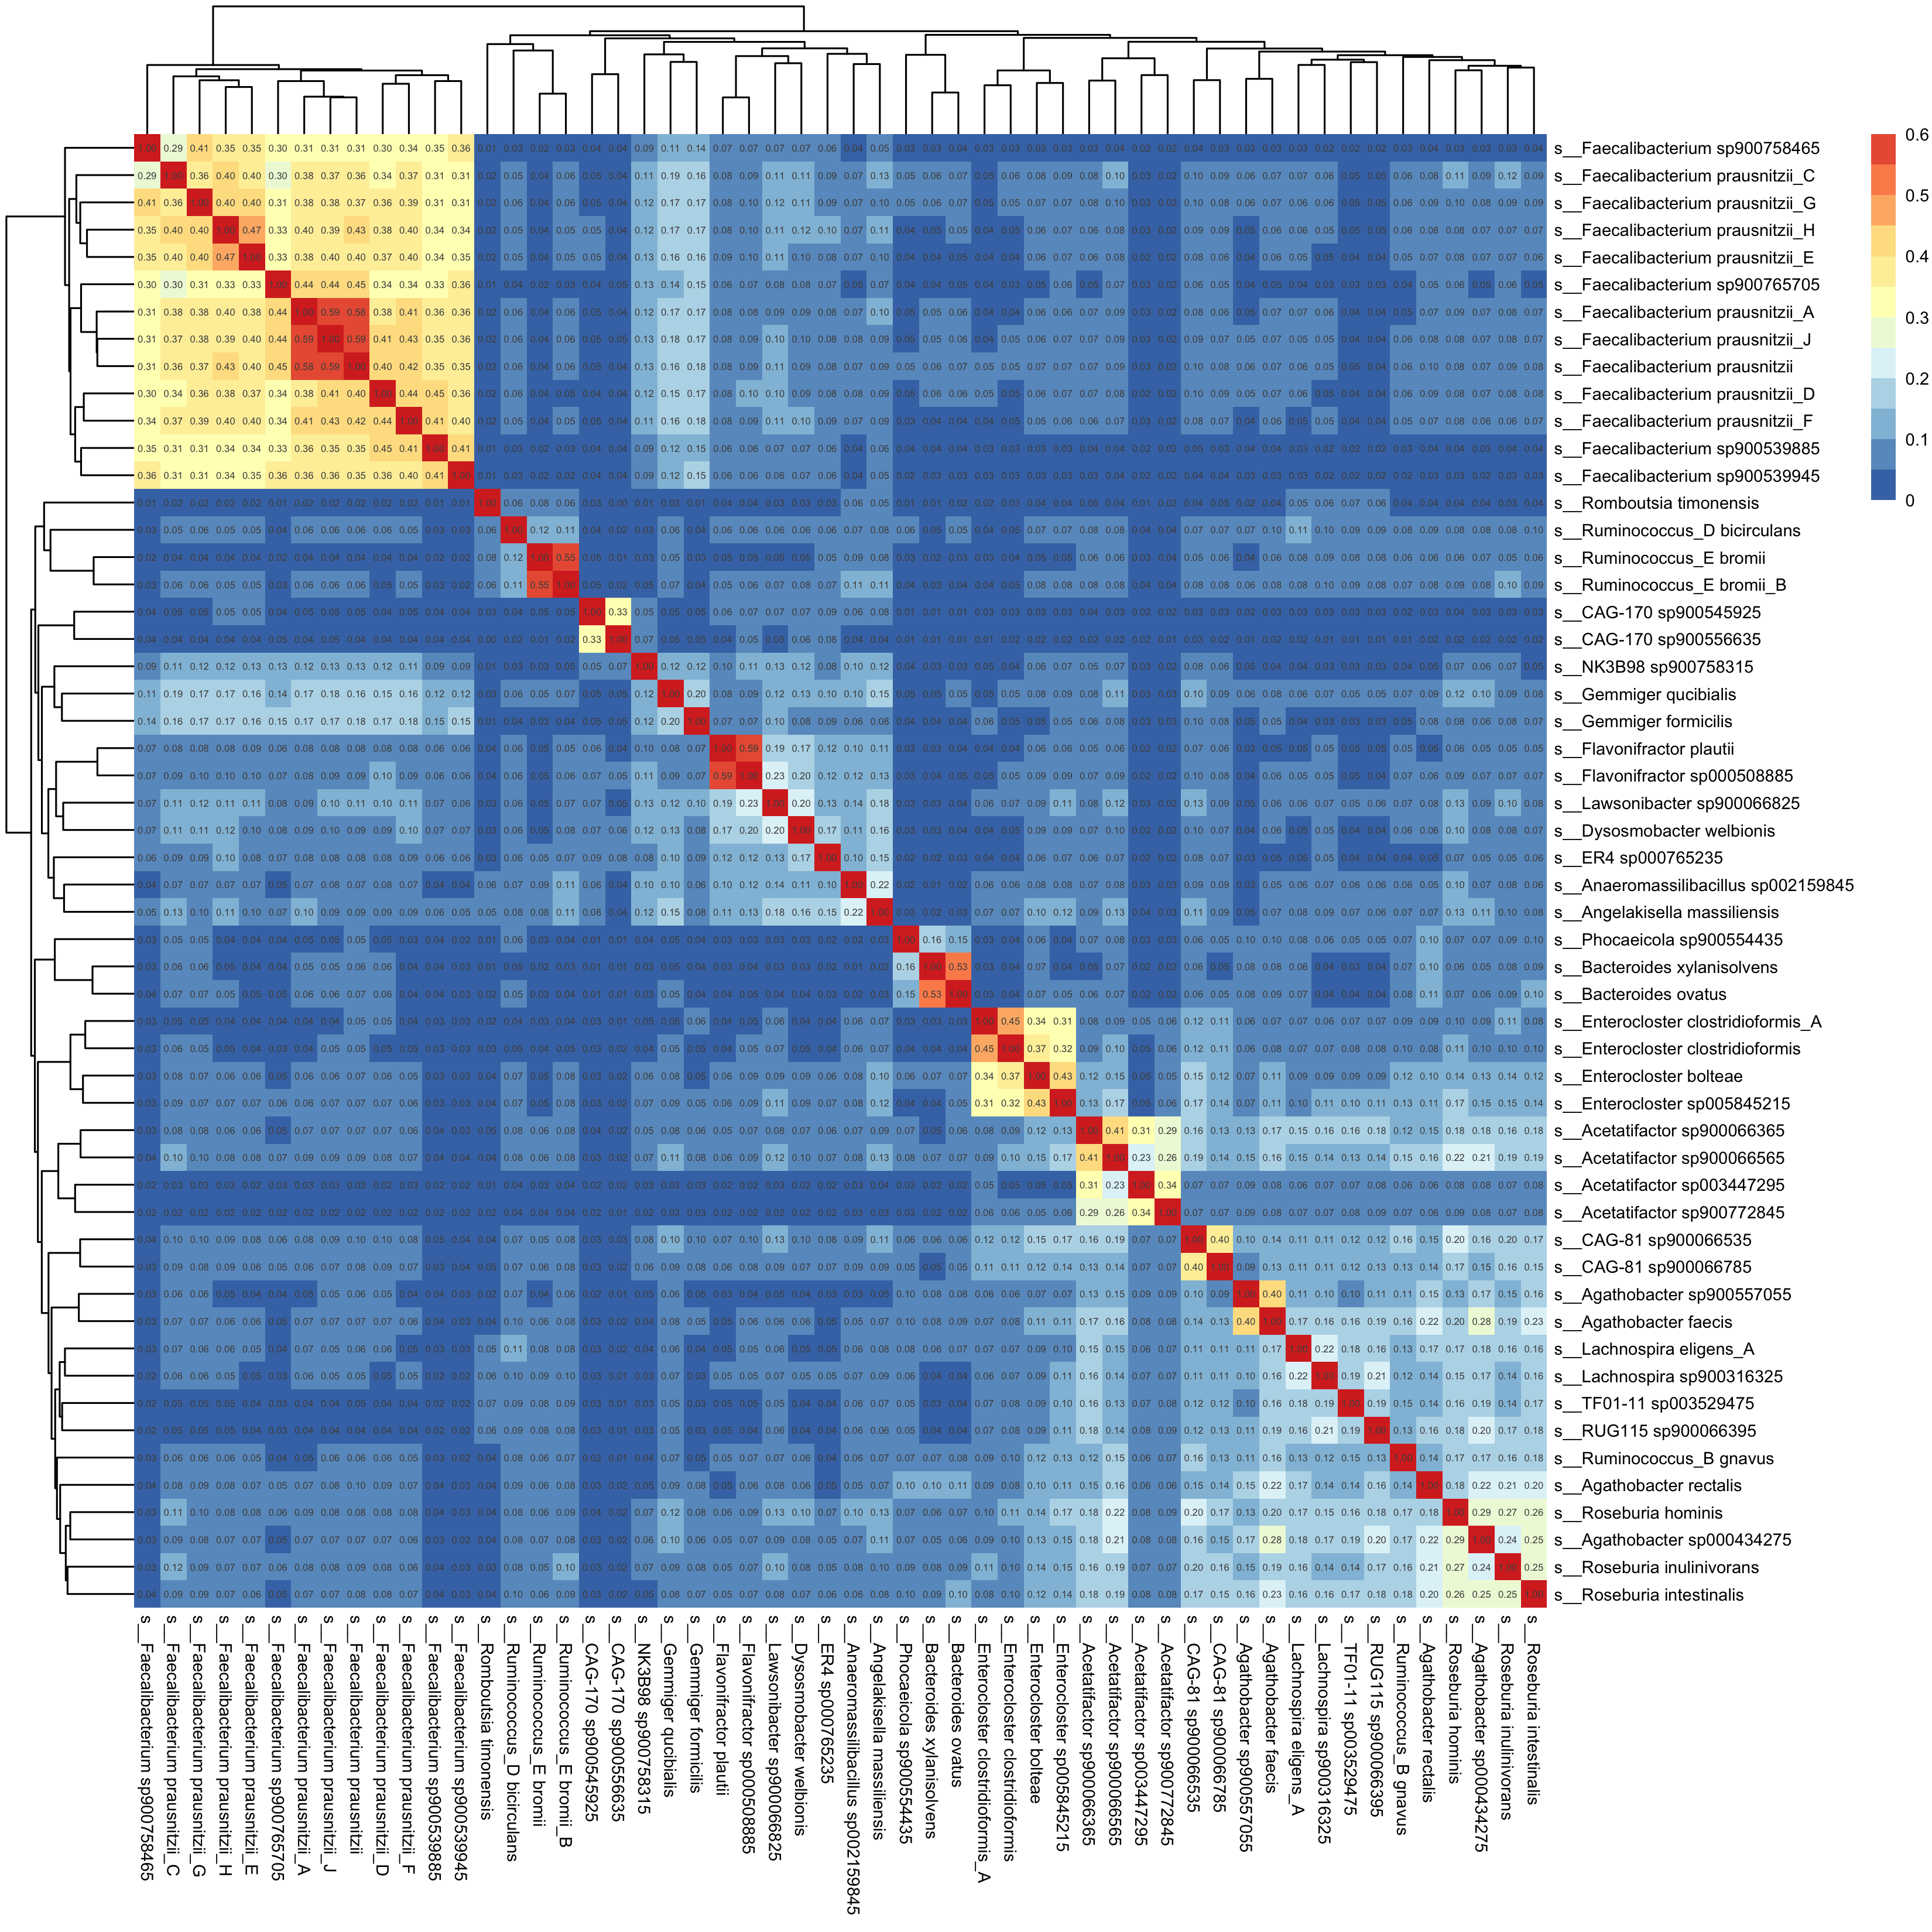

In [23]:
breaklist <- seq(0, .6, by = .05)
pheatmap(comp, fontsize = 7, display_numbers = T, fontsize_number = 4,
         border_color = NA, breaks = breaklist,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaklist)))